# Electricity Day-Ahead Market Price EDA

In [1]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as tsap
%matplotlib inline

E:\Work\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The data that we'll look at consists of the hourly prices of electricity in the day-ahead market for three years (15/07/2015 - 15/07/2018). The measurement unit of the price is TL/MWh.
I prefered not to go back in time more than three years because considerable changes are occuring in the electricity market structure as well as the country's economy, so the insights gained from old data my not be valid for the current situation.

In [2]:
df = pd.read_csv('MCP-15072015-15072018.csv', parse_dates = [[0,1]], dayfirst=True)
df.head()

,Date_Hour,MCP (TL/MWh)
0,2015-07-15 00:00:00,151.98
1,2015-07-15 01:00:00,154.16
2,2015-07-15 02:00:00,134.99
3,2015-07-15 03:00:00,128.00
4,2015-07-15 04:00:00,124.99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26328 entries, 0 to 26327
Data columns (total 2 columns):
Date_Hour       26328 non-null datetime64[ns]
MCP (TL/MWh)    26328 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 411.5+ KB


MCP is not recognized as a numeric value.

In [4]:
df = df.set_index(['Date_Hour'])
df.rename(columns={"MCP (TL/MWh)" : "MCP"}, inplace=True)
# Converting MCP to numeric value
df['MCP'] = df['MCP'].str.replace(',','')
df['MCP'] = df['MCP'].apply(pd.to_numeric)
df.head()

,MCP
Date_Hour,
2015-07-15 00:00:00,151.98
2015-07-15 01:00:00,154.16
2015-07-15 02:00:00,134.99
2015-07-15 03:00:00,128.00
2015-07-15 04:00:00,124.99


In [5]:
df.describe()

,MCP
count,26328.000000
mean,156.825280
std,53.932223
min,0.000000
25%,128.327500
50%,160.000000
75%,196.917500
max,1899.990000


The coefficient of variation equals 34.39% which is very high for prediction purposes.

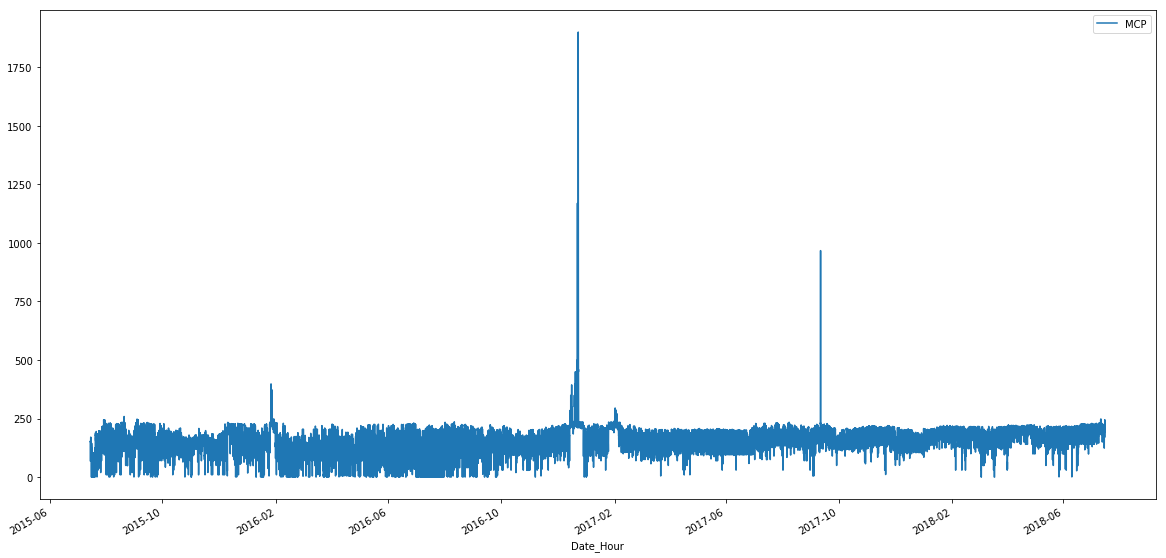

In [6]:
# Plotting the data
df.plot(figsize=(20,10))

From this graph we see that the prices have less variance in general since the end of 2016, this indicates that it is heteroscedastic. The prices don't fall close to zero as much as they were before the end of 2016.

In [7]:
# Creating monthly averages
df_monthly = df_monthly = df.resample('M', label = 'right').mean()
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2015-07-31 to 2018-07-31
Freq: M
Data columns (total 1 columns):
MCP    37 non-null float64
dtypes: float64(1)
memory usage: 592.0 bytes


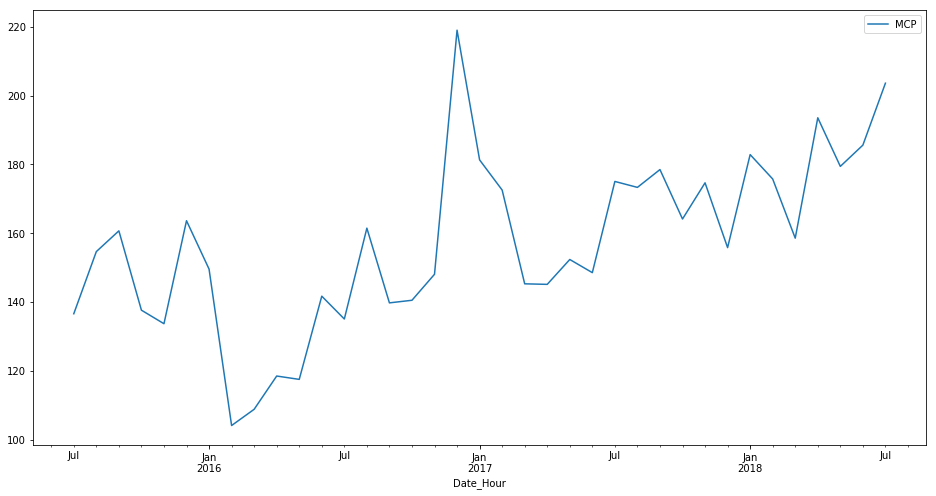

In [8]:
df_monthly.plot(figsize=(16,8))

We can see that there is an upward trend in the electricity price over time. We also cannot readily notice any monthly seasonality from the figure.

In [9]:
# Decomposing time components to check their effect on the price
df['day_of_year'] = df.index.dayofyear
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['week_day'] = df.index.day_name()
df['hour'] = df.index.hour
df.head()

,MCP,day_of_year,month,day_of_month,week_day,hour
Date_Hour,,,,,,
2015-07-15 00:00:00,151.98,196,7,15,Wednesday,0
2015-07-15 01:00:00,154.16,196,7,15,Wednesday,1
2015-07-15 02:00:00,134.99,196,7,15,Wednesday,2
2015-07-15 03:00:00,128.00,196,7,15,Wednesday,3
2015-07-15 04:00:00,124.99,196,7,15,Wednesday,4


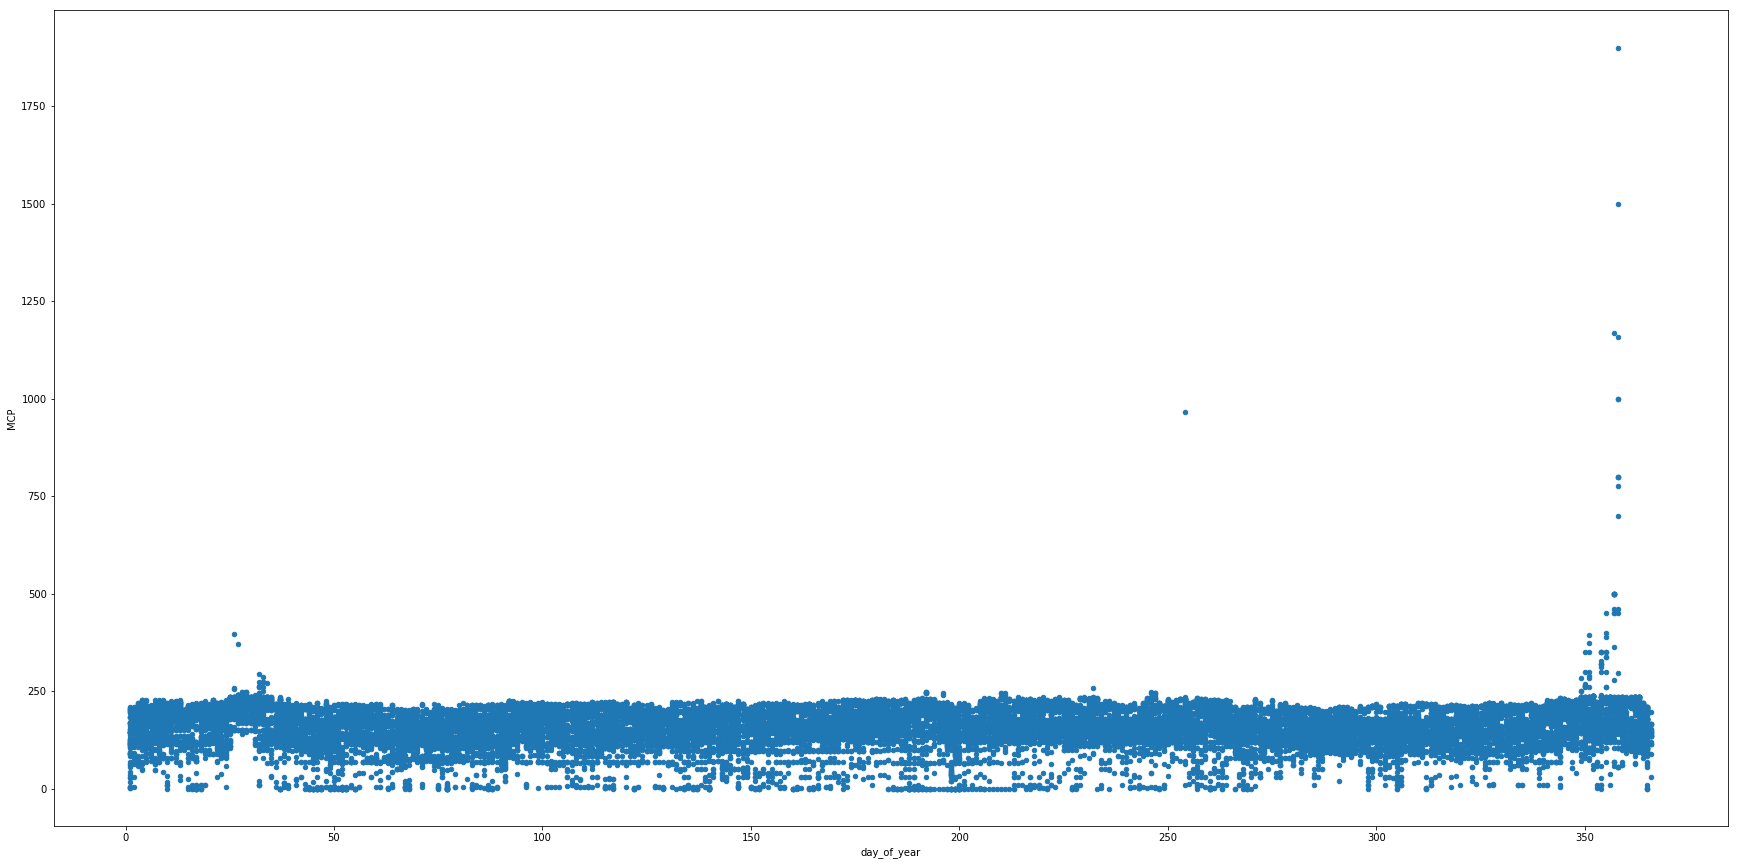

In [10]:
# Does the day of the year affect the electricity price?
df.plot(x= 'day_of_year', y= 'MCP',kind='scatter', figsize=(30,15))

In the 30s we can see some increase in the price. Towards the end of the year, there was an upward spike in the price. We need to check if this is recurrent or if it happened due to some special non-recurrent cause.

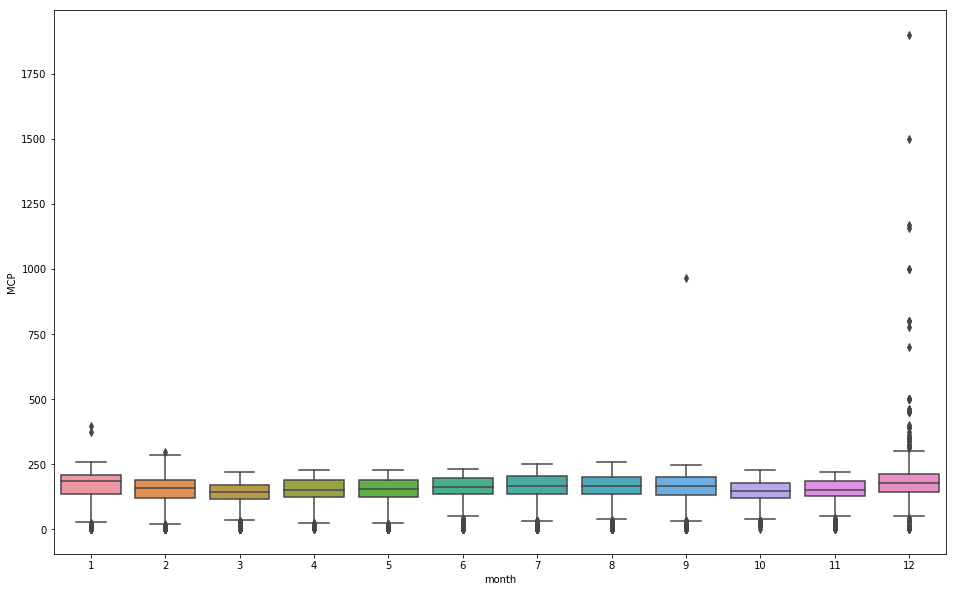

In [11]:
# Does the month of the year affect the electricity price?
fig, ax = plt.subplots(figsize=(16, 10))
sns.boxplot(x='month', y='MCP', data=df, ax=ax)

Aside from the spike in December, we notice that the prices in March, October and November were slightly lower than other months for the past three years.

In [12]:
# Checking the extreme values
df[df['MCP'] > 400]

,MCP,day_of_year,month,day_of_month,week_day,hour
Date_Hour,,,,,,
2016-12-20 11:00:00,450.00,355,12,20,Tuesday,11
2016-12-22 09:00:00,450.01,357,12,22,Thursday,9
2016-12-22 10:00:00,450.01,357,12,22,Thursday,10
2016-12-22 11:00:00,499.77,357,12,22,Thursday,11
2016-12-22 13:00:00,499.78,357,12,22,Thursday,13
2016-12-22 14:00:00,500.00,357,12,22,Thursday,14
2016-12-22 15:00:00,500.00,357,12,22,Thursday,15
2016-12-22 16:00:00,500.01,357,12,22,Thursday,16
2016-12-22 17:00:00,1169.55,357,12,22,Thursday,17


We can see that most of the spikes happened between 20-23 Dec 2016. After investigation, it was found that this price spike happened because of a natural gas crisis that happened in Turkey during that time. There is no clear reason for the spike that happened in 11 Sep 2017. It is better to remove these extreme values to have better analysis results.

In [13]:
# Removing the values
df.loc[df['MCP'] > 400, 'MCP'] = np.nan

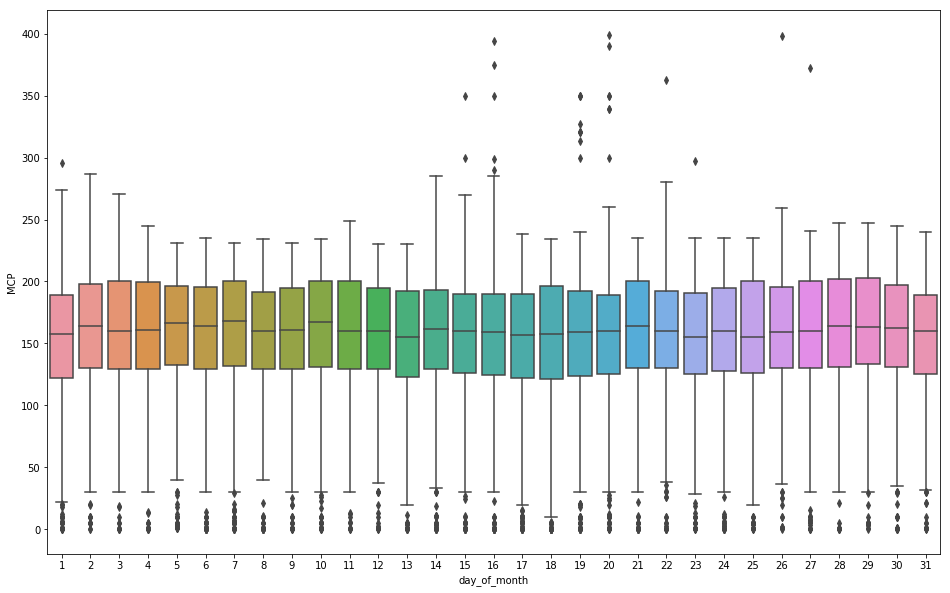

In [14]:
# Does the day of the month affect the electricity price?
fig1, ax1 = plt.subplots(figsize=(16, 10))
sns.boxplot(x='day_of_month', y='MCP', data=df, ax=ax1)

The distribution of the prices for each day of the month seem quite similar to each other with some difference in variance between different days. 

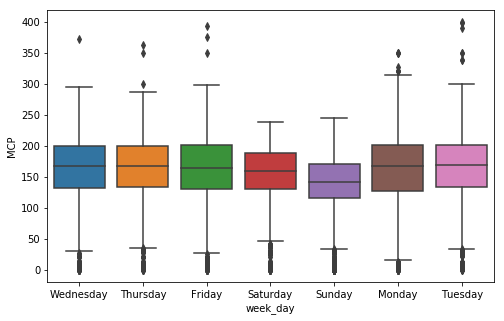

In [15]:
# Does the weekday affect the electricity price?
fig2, ax2 = plt.subplots(figsize=(8, 5))
sns.boxplot(x='week_day', y='MCP', data=df, ax=ax2)

It appears that the price on weekends tend to be lower than other days, especially sunday.

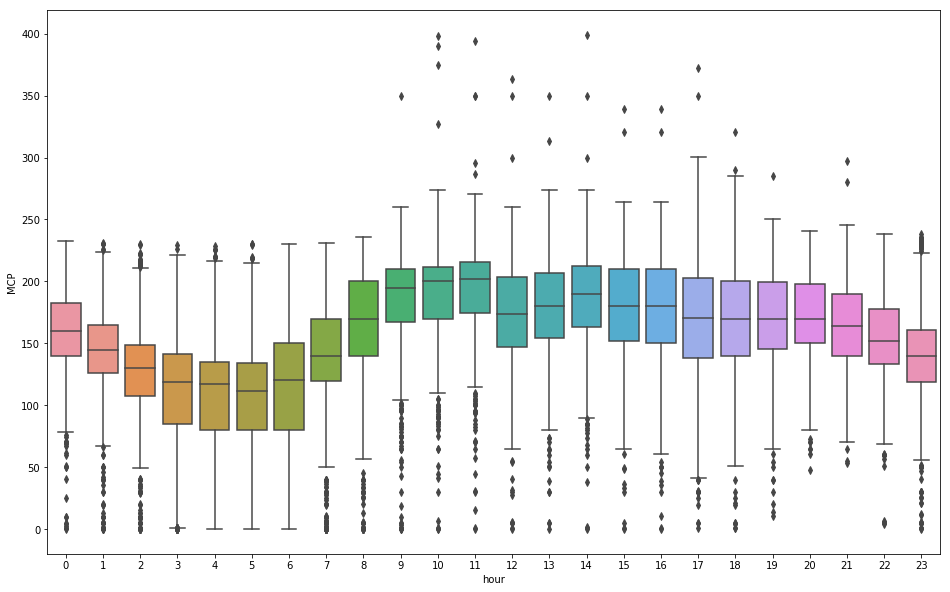

In [16]:
# Does the hour of the day affect the electricity price?
fig3, ax3 = plt.subplots(figsize=(16, 10))
sns.boxplot(x='hour', y='MCP', data=df, ax=ax3)

We can notice the considerable change in the prices during the day, with lower prices at nignt and early morning and higher at daytime with more upward spikes. We also notice in all the plots we've seen so far that there are many outliers, which makes the task of predicting the prices quite hard.

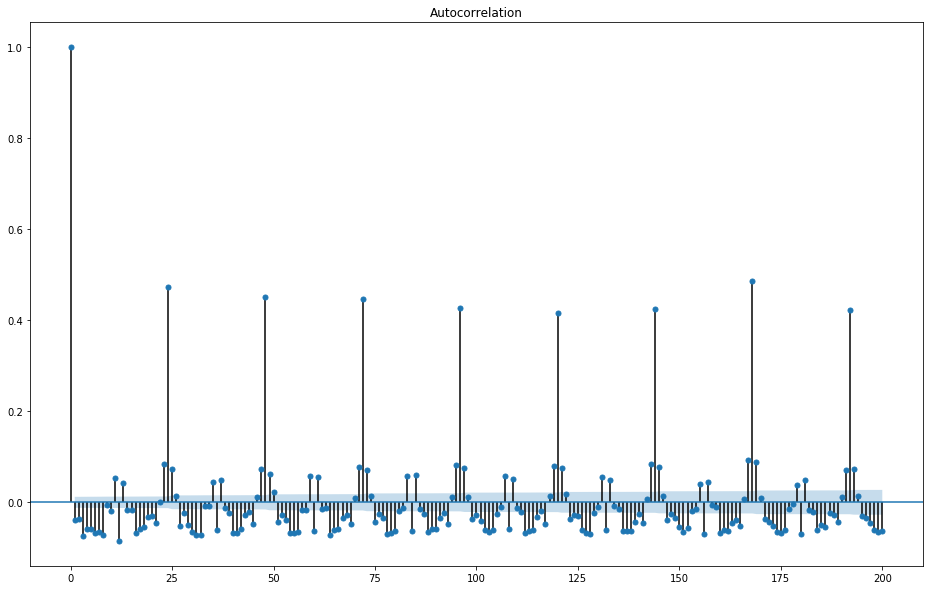

In [17]:
# Cheching autocorrelation of differenced hourly prices
p = df['MCP'].fillna(df['MCP'].mean())
fig4, ax4 = plt.subplots(figsize=(16, 10))
dummy = tsap.plot_acf(p.diff().dropna(), lags=200, ax=ax4)

We can notice the correlation between point h and h-24, which is expected. Because the price at a specific hour is affected by the price at the same hour the previous day.

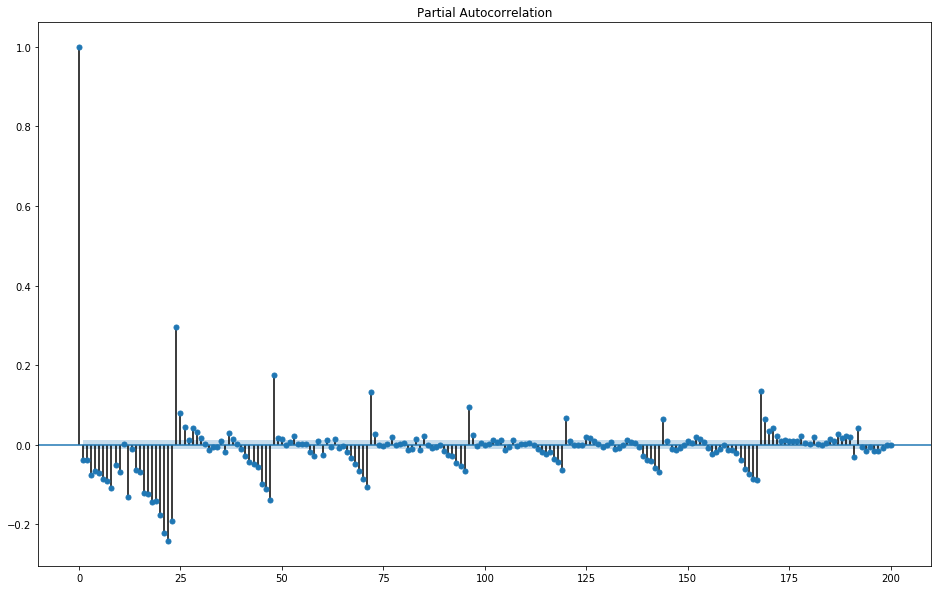

In [18]:
# Cheching the partial autocorrelation of differenced hourly prices
fig5, ax5 = plt.subplots(figsize=(16, 10))
dummy = tsap.plot_pacf(p.diff().dropna(), lags=200, ax=ax5)

This plot tells us that not only h-24 but also h-48, h-72... independently affect current hour's price. Also the negative correlation between h and h-20, h-21, h-22, h-23 is quite interesting and not intuitive.

In [19]:
# To analyze an hourly price on a daily basis, I arbitrarily chose price at 11:00 hours everyday to analyze
p11 = df[df['hour'] == 11]['MCP']
p11.head()

Date_Hour
2015-07-15 11:00:00    170.00
2015-07-16 11:00:00    144.95
2015-07-17 11:00:00     44.19
2015-07-18 11:00:00    100.00
2015-07-19 11:00:00     99.99
Name: MCP, dtype: float64

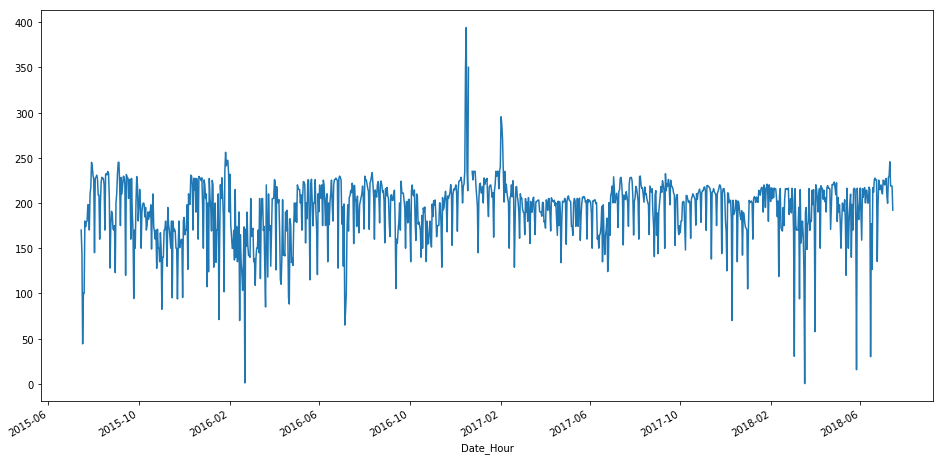

In [20]:
p11.plot(figsize=(16,8))

The mean seems to be quite stable. Nothing much can be said just by looking.

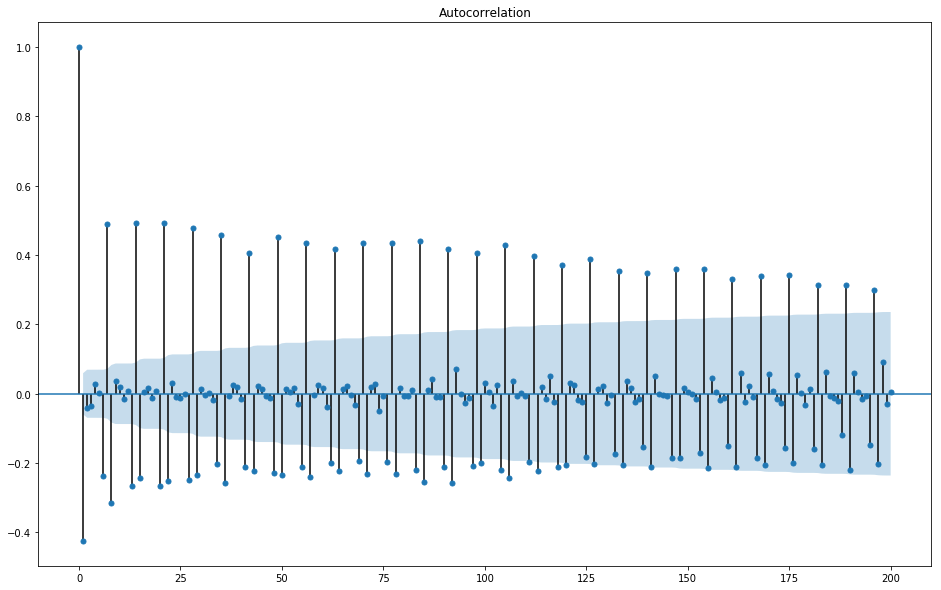

In [21]:
# Cheching autocorrelation of differenced prices (daily at 11:00 hours)
fig6, ax6 = plt.subplots(figsize=(16, 10))
dummy = tsap.plot_acf(p11.diff().dropna(), lags=200, ax=ax6)

We can see some seasonality here. There is weekly positive correlation. Also, interestingly, there is negative correlation between d-1 and d-6

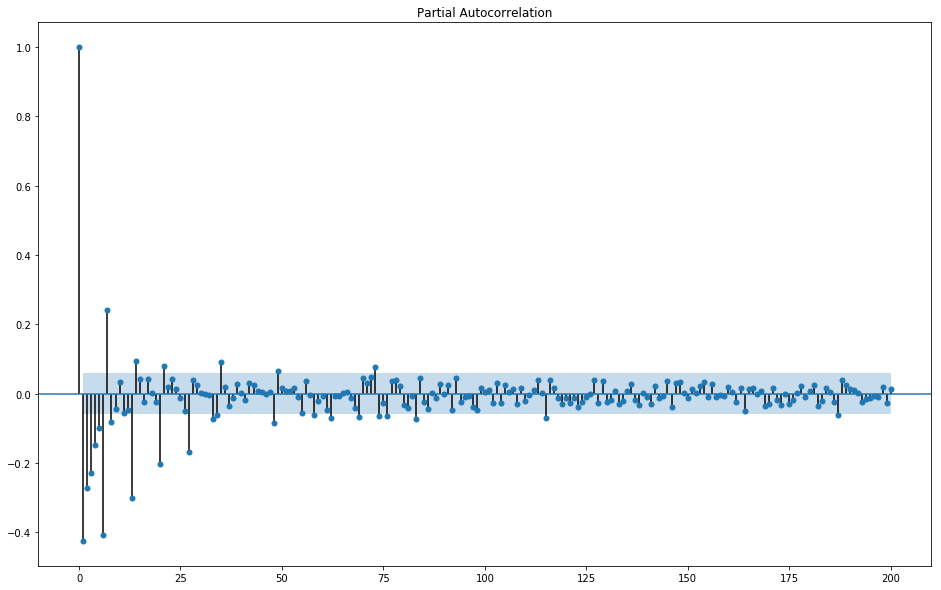

In [22]:
# Cheching the partial autocorrelation of differenced prices (daily at 11:00 hours)
fig7, ax7 = plt.subplots(figsize=(16, 10))
dummy = tsap.plot_pacf(p11.diff().dropna(), lags=200, ax=ax7)

This graph suggests that there is a negative correlation between the price in a day and the prices in the other days of the week.

In [23]:
# Preparing to check for correlation between daily average prices and USD exchange rates
df_daily = df['MCP']
df_daily = df_daily.resample('D', label = 'left').mean()
df_daily.head()

Date_Hour
2015-07-15    139.967083
2015-07-16    109.069583
2015-07-17     31.467083
2015-07-18     56.217500
2015-07-19     61.900000
Freq: D, Name: MCP, dtype: float64

In [24]:
exr = pd.read_csv('EVDS.csv', parse_dates = [0], dayfirst=True)
exr.dropna(inplace=True)
exr.set_index('Date', inplace=True)

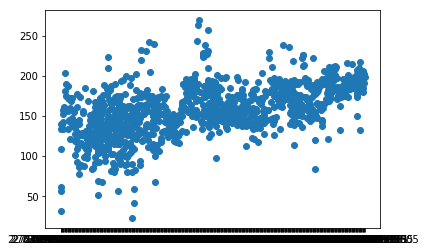

In [25]:
plt.scatter(exr, df_daily)

We can see that there is a positive correlation between the USD exchange rate and the electricity price in Turkey.